# Theorical Questions
In this section, we aim to understand the complexity of our perceptron algorithm in term of time and space.


1.   Computational/Time Complexity: The first loop do the n iterations, in each itération, we will travel our entire training dataset which have m instance, for each instance, we have d multiplications which is the length of our element. so we can say that the time complexity is the multiplication of the 3 previous named variable. And therefor, we will get an o(n * m * d)

2.   Space Complexity: we will take the variable that take most space in memory which is our weight w with d as dimension. So the space complexity will be o(d+1)

# Installation Part

In [ ]:
!pip install numpy==1.19.5
!pip install matplotlib==3.2.2
!pip install sklearn
!pip install pandas==1.1.5

# Implementation Part

## Generic Briks to use later

In [ ]:
from numpy import *
import matplotlib.pyplot as plt
from pandas import *
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

### Data Generation

In [ ]:
def generate(sigma1,sigma2):
  # we generate the data based on the suggested sigma
  x1=append(random.normal(-1,sigma1,125),random.normal(1,sigma1,125))
  x2=random.normal(0,sigma2,250)
  # label generation
  y=[-1 if i<126 else 1 for i in range(1,251)]
  #Storing the data in a dataframe
  df=DataFrame()
  df['x1'],df['x2'],df['y']=x1,x2,y
  # shuffling the dataframe with shuffle of sklearn
  df=shuffle(df)
  y=df.pop('y')
  # splitting the data into a training and test set
  X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test


### Perceptron Algorithm

In [ ]:
def perceptron(n):
  # initialization
  w=[0,0]
  w1=[0,0]

  for j in range(1,n+1):
    w1=w
    for i in range(1,200):
      # extracting the feature and the labels
      y_i=y_train.iloc[i]
      x_i=DataFrame.to_numpy(X_train.iloc[i,:])
      # update the weight of our neural net
      if y_i*dot(x_i,w)<=0:
        w=w+y_i*x_i
      # if there is no update in the weight,return the current value
    if (w1 == w).all():
      return w
      # if we reach the limit of iteration without finding the optimal weight, return the current value
  return w


In [ ]:
def predict(X,w):
# we compute the scalair product between w and X
# if it's positive, we will return 1 as label otherwise -1
    if dot(w,X) >= 0.0:
      return 1
    else:
      return -1


### The plot decision boundry

In [278]:
def  plot_decision_boundry(X,y,w):
  plt.figure(figsize=(5,5))
  # plot the points of the traning set
  plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap='Paired_r', edgecolors='k');
  # calculating of the coeffiecient of our decision boundry
  coef=-1*w[0]/w[1]
  # defining the x and y point of our boundry
  xx = linspace(-2, 2)
  yy =  coef * xx 
  # plotting the linear boundry
  plt.plot(xx,yy,'k-')
  plt.grid()
  plt.title("Data_visualisation with perceptron decision_boundry")
  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.gca().set_ylim([-2, 2])


### Computing the Accurency

In [ ]:
def error_rate(X1,w):
  list=[]
  for element in range(0,50):
    X=DataFrame.to_numpy(X1.iloc[element,:])
    list.append(predict(X,w))
  correspanding_values=numpy.sum(numpy.asarray(list)==DataFrame.to_numpy(y_test))
  return 1- correspanding_values/len(list)

## The experiments

### Experiment 1

#### Question1
The algorithm will converge in this case because we have a little value of variance. So our variable will be linearly separable.

In general, if a data set is linearly separable, the Perceptron will find a separating hyperplane in a finite number of updates. 

In [ ]:
X_train, X_test, y_train, y_test=generate(0.25,0.25)
w=perceptron(10)

[0.92593386 0.91683167]


#### Question2

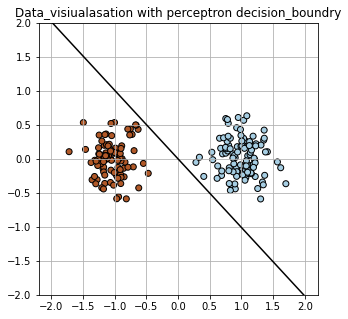

In [ ]:
plot_decision_boundry(X_train, y_train,w)

In this case, the Percpetron has find an hyperplan(in our case we will get a linear line). So we have a beautiful seperation between the 2 labels. This is not the only boundry that we can draw. But if we try to initiliaze the algorithm to a random value, we will get other value of wieght so another decision boundry.


#### Question3

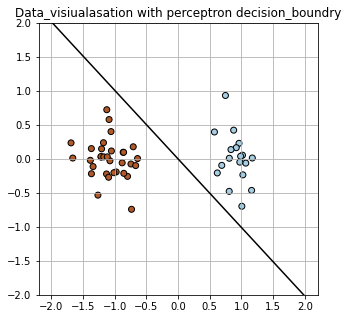

In [ ]:
plot_decision_boundry(X_test, y_test,w)

In [ ]:
err=error_rate(X_test,w)
print("the exactude of the algorithm is ", 100*(1-err),"%")
print("the error rate is ",err*100,"%")


the exactude of the algorithm is  100.0 %
the error rate is  0.0 %


Like said perviously, in this case the variable are linear seperable, so the computing of the accurency and the plot show the same result. That result is we predict the label of our training set rightly.  

### Experiment 2

#### Question1
The algorithm will not converge in this case because we have a highter value of variance than the last time. So our variable will be not linearly separable.

In general, If the data is not linearly separable, it will loop forever. So in this case, we added a little condition, that if we reach the limit of number of iteration, we take the last value computed of the weights. 

In [ ]:
X_train, X_test, y_train, y_test=generate(0.75,0.75)
w=perceptron(50)
print(w)

[ 1.54171853 -0.15629223]


#### Question2

No handles with labels found to put in legend.


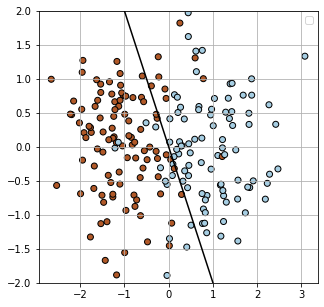

In [ ]:
plot_decision_boundry(X_train, y_train,w)

In this case, the Percpetron has not find an hyperplan that can seperate between the 2 labels. This is caused by the fact that our variables not being linear seperable. So like the draw shows, we can see that we have not a goods classifications et some outliers can be found.
Even if we change the value of our initialisations, we will not have a seperation.


#### Question3

No handles with labels found to put in legend.


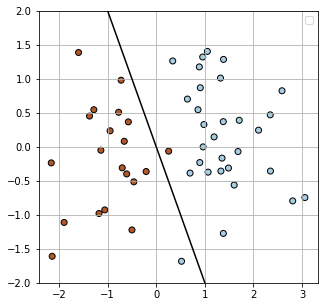

In [ ]:
plot_decision_boundry(X_test, y_test,w)

In [ ]:
err=error_rate(X_test,w)
print("the exactude of the algorithm is ", 100*(1-err),"%")
print("the error rate is ",err*100,"%")

the exactude of the algorithm is  100.0 %
the error rate is %2f  0.0 %


Like said previously, the training out shows a not full seprablity. So in the test also we will find some outliers also from where the existance of an error rate highter than zero.

As a conclusion to the two different expirements, we can say that we must have a little value of the variance to have our variable linear seperable for the purpose of highter performance.

### Experiment 3

In [273]:
# the different value of variance
sigmas=[0.01, 0.1,0.25,0.5,0.7,0.75,1]
# initialzing the lists that will contain the mean and variance values
mean=[]
variance=[]
for sigma in sigmas:
  # the list containing the error to use later for statistical studies
  list=[]
  # do the expriments 30 times.
  for element in range(1,31):
    # an expirement consist of generating data, training the model, do a prediction on th test set and evaluating the error rate.
    X_train, X_test, y_train, y_test=generate(sigma,sigma)
    w=perceptron(10)
    list.append(error_rate(X_test,w))
  # add the error mean and variance to a the correspanding rates
  mean.append(numpy.mean(list))
  variance.append(numpy.var(list))

Text(0.5, 1.0, 'The bar error graph')

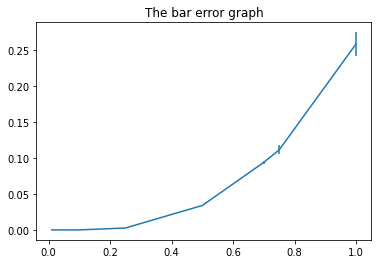

In [276]:
pyplot.errorbar(x=sigmas,y=mean, yerr=variance)
plt.title("The bar error graph")



##### Interpretation
As shown in the errorbar figure, the most the distribution variance increase, the average error also do the same as well as its variance. That was expectable because the more the distribution's variance increase, the most the effect of the non linearity separation become more obvious. And by consequence the more the sigma square rise, the more diffuclt we can find a legitme decision boundry and more outliers will be having.